# Stata on Jupyter Notebook

### https://youtu.be/VGRDR3J346M

In [1]:
import stata_setup
stata_setup.config("C:/Program Files/Stata17", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 20 Mar 2022
Serial number: 401709302059
  Licensed to: Joonhee Lee
               KAIST

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [2]:
import os
os.chdir("C:/Users/2joon/OneDrive/바탕 화면/응용계량경제학/실습/")

# import pandas as pd
# fatality=pd.read_stata("data/fatality.dta")
# sidextract=pd.read_stata("data/mus08psidextract.dta")

In [3]:
%%stata
* "C:/Users/2joon/OneDrive/바탕 화면/응용계량경제학/실습/"
dir


. * "C:/Users/2joon/OneDrive/바탕 화면/응용계량경제학/실습/"
. dir
  <dir>   3/14/22 14:51  .                 
  <dir>   3/14/22 14:39  ..                
  <dir>   3/14/22 14:30  data              
 526.6k   3/02/22 21:22  data (1).zip      
 813.2k   3/02/22 21:22  data (2).zip      
  82.6k   3/02/22 21:22  data.zip          
  <dir>   3/14/22 15:30  results           

. 


In [4]:
%%stata
set more off
version 13
clear all // removes data and value labels from memory


. set more off

. version 13

. clear all // removes data and value labels from memory

. 


In [5]:
%%stata
* Read in Data
use data/fatality.dta, clear
desc


. * Read in Data
. use data/fatality.dta, clear

. desc

Contains data from data/fatality.dta
 Observations:           336                  
    Variables:            43                  29 Dec 2010 19:38
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
state           byte    %9.0g      sid        State ID (FIPS) Code
year            int     %9.0g                 Year
spircons        float   %9.0g                 Spirits Consumption
unrate          float   %9.0g                 Unemployment Rate
perinc          float   %9.0g                 Per Capita Personal Income
emppop          float   %9.0g                 Employment/Population Ratio
beertax         float   %9.0g                 Tax on Case of Beer
sobapt          float   %9.0g                 % Southern Baptist
mormon

In [6]:
%%stata
***** Summary Statistics *****
sum year state
tab state
tab state, nolabel


. ***** Summary Statistics *****
. sum year state

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        year |        336        1985    2.002983       1982       1988
       state |        336     30.1875    15.30985          1         56

. tab state

   State ID |
(FIPS) Code |      Freq.     Percent        Cum.
------------+-----------------------------------
         AL |          7        2.08        2.08
         AZ |          7        2.08        4.17
         AR |          7        2.08        6.25
         CA |          7        2.08        8.33
         CO |          7        2.08       10.42
         CT |          7        2.08       12.50
         DE |          7        2.08       14.58
         FL |          7        2.08       16.67
         GA |          7        2.08       18.75
         ID |          7        2.08       20.83
         IL |          7        2.08       2

In [7]:
%%stata
gen vfrall=10000*mrall 
// fatality rate per 10K in the population


. gen vfrall=10000*mrall 

. // fatality rate per 10K in the population
. 


In [8]:
%%stata
sum vfrall beertax


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      vfrall |        336    2.040444    .5701938     .82121    4.21784
     beertax |        336     .513256    .4778442   .0433109   2.720764


In [9]:
%%stata
gen dvfrall=vfrall-vfrall[_n-6] // disparity between 6 yrs
gen dbtax=beertax-beertax[_n-6]


. gen dvfrall=vfrall-vfrall[_n-6] // disparity between 6 yrs
(6 missing values generated)

. gen dbtax=beertax-beertax[_n-6]
(6 missing values generated)

. 


### Figure 10.1

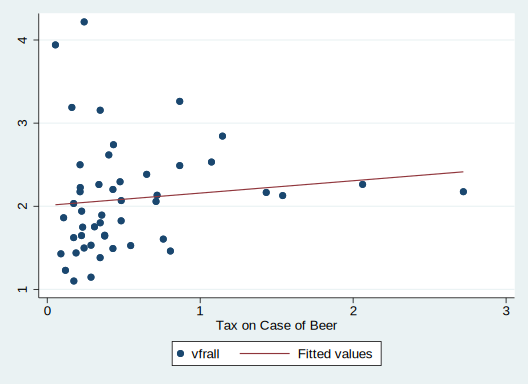

In [10]:
%%stata
twoway (scatter vfrall beertax if year==1982) (lfit vfrall beertax if year==1982)

In [11]:
%%stata
graph export results/figure10_1.png, as(png) replace

file results/figure10_1.png written in PNG format


### Figure 10.2


. twoway (scatter dvfrall dbtax if year==1988) (lfit dvfrall dbtax if year==198
> 8)

. graph export results/figure10_2.png, as(png) replace
file results/figure10_2.png written in PNG format

. 


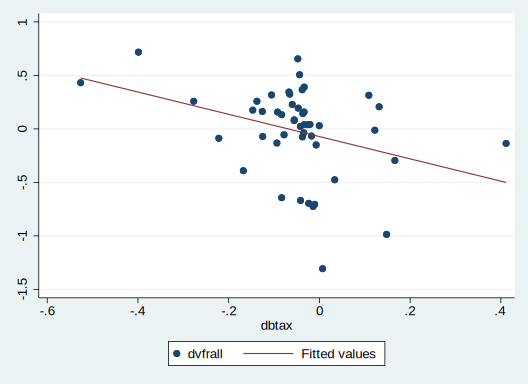

In [12]:
%%stata
twoway (scatter dvfrall dbtax if year==1988) (lfit dvfrall dbtax if year==1988)
graph export results/figure10_2.png, as(png) replace

### Equation Table 10.1

In [13]:
%%stata
// Data transformations, create dummy variables, etc.
xtset state year


. // Data transformations, create dummy variables, etc.
. xtset state year

Panel variable: state (strongly balanced)
 Time variable: year, 1982 to 1988
         Delta: 1 unit

. 


In [14]:
%%stata
// minimum legal drinking age
tab mlda
gen da18=(mlda<19)
gen da19=(mlda>=19)*(mlda<20)
gen da20=(mlda>=20)*(mlda<21)
gen da21=(mlda>=21)


. // minimum legal drinking age
. tab mlda

    Minimum |
      Legal |
   Drinking |
        Age |      Freq.     Percent        Cum.
------------+-----------------------------------
         18 |         12        3.57        3.57
       18.5 |          3        0.89        4.46
         19 |         49       14.58       19.05
      19.16 |          1        0.30       19.35
      19.25 |          2        0.60       19.94
       19.5 |          2        0.60       20.54
      19.67 |          6        1.79       22.32
         20 |         20        5.95       28.27
      20.25 |          1        0.30       28.57
      20.33 |          2        0.60       29.17
       20.5 |          6        1.79       30.95
         21 |        232       69.05      100.00
------------+-----------------------------------
      Total |        336      100.00

. gen da18=(mlda<19)

. gen da19=(mlda>=19)*(mlda<20)

. gen da20=(mlda>=20)*(mlda<21)

. gen da21=(mlda>=21)

. 


In [15]:
%%stata
// real income per capita in $1000
gen incperc=perinc/1000

// log real income per capita in $1000
gen lincperc = ln(incperc)

// averager vehicle miles per driver
sum vmiles
gen vmilespd=vmiles/1000


. // real income per capita in $1000
. gen incperc=perinc/1000

. 
. // log real income per capita in $1000
. gen lincperc = ln(incperc)

. 
. // averager vehicle miles per driver
. sum vmiles

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      vmiles |        336    7890.754    1475.659   4576.346   26148.27

. gen vmilespd=vmiles/1000

. 


In [16]:
%%stata
// gen vmilespd=vmiles/1000
replace vmilespd=vmiles/10000
drop vmilespd
gen vmilespd=vmiles/1000


. // gen vmilespd=vmiles/1000
. replace vmilespd=vmiles/10000
(336 real changes made)

. drop vmilespd

. gen vmilespd=vmiles/1000

. 


In [17]:
%%stata
// mandatory jail or community service
tab jaild
tab comserd
gen jailcom = (jaild==1) | (comserd==1)


. // mandatory jail or community service
. tab jaild

  Mandatory |
       Jail |
   Sentence |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        241       71.94       71.94
          1 |         94       28.06      100.00
------------+-----------------------------------
      Total |        335      100.00

. tab comserd

  Mandatory |
  Community |
    Service |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        273       81.49       81.49
          1 |         62       18.51      100.00
------------+-----------------------------------
      Total |        335      100.00

. gen jailcom = (jaild==1) | (comserd==1)

. 


In [18]:
%%stata
help tab


Tables of frequencies
---------------------

    See

        tabulate oneway       for one-way tables of frequencies

        tabulate twoway       for two-way tables of frequencies

    and see

        tabulate, summarize() for one- and two-way tables of summary
                                statistics
. 

In [19]:
%%stata
// year dummies
gen y82=(year==1982)
gen y83=(year==1983)
gen y84=(year==1984)
gen y85=(year==1985)
gen y86=(year==1986)
gen y87=(year==1987)
gen y88=(year==1988)


. // year dummies
. gen y82=(year==1982)

. gen y83=(year==1983)

. gen y84=(year==1984)

. gen y85=(year==1985)

. gen y86=(year==1986)

. gen y87=(year==1987)

. gen y88=(year==1988)

. 


In [20]:
%%stata
// macro
global agedum "da18 da19 da20"
global controls "jailcom vmilespd unrate lincperc"
global yeardum "y83 y84 y85 y86 y87 y88"


. // macro
. global agedum "da18 da19 da20"

. global controls "jailcom vmilespd unrate lincperc"

. global yeardum "y83 y84 y85 y86 y87 y88"

. 


In [21]:
%%stata
***** col(1) *****
reg vfrall beertax, r
dis "Adjusted Rsquared = " e(r2_a) //dis for display // normal r2 and adjusted r2_a


. ***** col(1) *****
. reg vfrall beertax, r

Linear regression                               Number of obs     =        336
                                                F(1, 334)         =      47.59
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0934
                                                Root MSE          =     .54374

------------------------------------------------------------------------------
             |               Robust
      vfrall | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     beertax |   .3646054   .0528524     6.90   0.000     .2606399     .468571
       _cons |   1.853308   .0471297    39.32   0.000     1.760599    1.946016
------------------------------------------------------------------------------

. dis "Adjusted Rsquared = " e(r2_a) //dis for

In [22]:
%%stata
* ssc install outreg2 // install outreg2 only once
outreg2 using results/table10_1.xls, replace se label dec(3) excel


. * ssc install outreg2 // install outreg2 only once
. outreg2 using results/table10_1.xls, replace se label dec(3) excel
results/table10_1.xls
dir : seeout

. 


In [23]:
%%stata
***** col(2) *****
xtreg vfrall beertax, fe vce(cluster state)
dis "Rsquared = "e(r2)
dis "Adjusted Rsquared = "e(r2_a)
outreg2 using results/table10_1.xls, append se label dec(3) excel


. ***** col(2) *****
. xtreg vfrall beertax, fe vce(cluster state)

Fixed-effects (within) regression               Number of obs      =       336
Group variable: state                           Number of groups   =        48

R-sq:  Within  = 0.0407                         Obs per group: min =         7
       Between = 0.1101                                        avg =       7.0
       Overall = 0.0934                                        max =         7

                                                F(1,47)            =      5.05
corr(u_i, Xb)  = -0.6885                        Prob > F           =    0.0294

                                 (Std. err. adjusted for 48 clusters in state)
------------------------------------------------------------------------------
             |               Robust
      vfrall | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     beertax |  -.65587

In [24]:
%%stata
* Get overall Adjusted Rsquared
qui areg vfrall beertax , absorb(state)
dis "Adjusted Rsquared = "e(r2_a)


. * Get overall Adjusted Rsquared
. qui areg vfrall beertax , absorb(state)

. dis "Adjusted Rsquared = "e(r2_a)
Adjusted Rsquared = .88912864

. 


In [25]:
%%stata
***** col(3) *****
xtreg vfrall beertax $yeardum, fe vce(cluster state)
test $yeardum
outreg2 using results/table10_1.xls, append se label dec(3) excel


* Get (only) overall Adjusted Rsquared
qui areg vfrall beertax $yeardum, absorb(state)
dis "Adjusted Rsquared = "e(r2_a)


. ***** col(3) *****
. xtreg vfrall beertax $yeardum, fe vce(cluster state)

Fixed-effects (within) regression               Number of obs      =       336
Group variable: state                           Number of groups   =        48

R-sq:  Within  = 0.0803                         Obs per group: min =         7
       Between = 0.1101                                        avg =       7.0
       Overall = 0.0876                                        max =         7

                                                F(7,47)            =      4.36
corr(u_i, Xb)  = -0.6781                        Prob > F           =    0.0009

                                 (Std. err. adjusted for 48 clusters in state)
------------------------------------------------------------------------------
             |               Robust
      vfrall | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     beertax |

In [26]:
%%stata
***** col(4) *****
* Professor has said this is main analysis
xtreg vfrall beertax $agedum $controls $yeardum, fe vce(cluster state)
test $yeardum
test $agedum
test unrate lincperc
outreg2 using results/table10_1.xls, append se label dec(3) excel


* Get (only) overall Adjusted Rsquared
qui areg vfrall beertax $agedum $controls $yeardum, absorb(state)
dis "Adjusted Rsquared = "e(r2_a)


. ***** col(4) *****
. * Professor has said this is main analysis
. xtreg vfrall beertax $agedum $controls $yeardum, fe vce(cluster state)

Fixed-effects (within) regression               Number of obs      =       336
Group variable: state                           Number of groups   =        48

R-sq:  Within  = 0.3893                         Obs per group: min =         7
       Between = 0.3253                                        avg =       7.0
       Overall = 0.2308                                        max =         7

                                                F(14,47)           =      9.36
corr(u_i, Xb)  = -0.8431                        Prob > F           =    0.0000

                                 (Std. err. adjusted for 48 clusters in state)
------------------------------------------------------------------------------
             |               Robust
      vfrall | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------

In [27]:
%%stata
***** col(5) *****
xtreg vfrall beertax $agedum jailcom vmilespd $yeardum, fe vce(cluster state)
test $yeardum
test $agedum
outreg2 using results/table10_1.xls, append se label dec(3) excel


* Get (only) overall Adjusted Rsquared
qui areg vfrall beertax $agedum jailcom vmilespd $yeardum, absorb(state)
dis "Adjusted Rsquared = "e(r2_a)


. ***** col(5) *****
. xtreg vfrall beertax $agedum jailcom vmilespd $yeardum, fe vce(cluster state)

Fixed-effects (within) regression               Number of obs      =       336
Group variable: state                           Number of groups   =        48

R-sq:  Within  = 0.1091                         Obs per group: min =         7
       Between = 0.0715                                        avg =       7.0
       Overall = 0.0535                                        max =         7

                                                F(12,47)           =      2.93
corr(u_i, Xb)  = -0.6614                        Prob > F           =    0.0041

                                 (Std. err. adjusted for 48 clusters in state)
------------------------------------------------------------------------------
             |               Robust
      vfrall | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+------------------------------------------------------

In [28]:
%%stata
***** col(6) *****
xtreg vfrall beertax mlda $controls $yeardum, fe vce(cluster state)
test $yeardum
test unrate lincperc
outreg2 using results/table10_1.xls, append se label dec(3) excel


* Get (only) overall Adjusted Rsquared
qui areg vfrall beertax mlda $controls $yeardum, absorb(state)
dis "Adjusted Rsquared = "e(r2_a)


. ***** col(6) *****
. xtreg vfrall beertax mlda $controls $yeardum, fe vce(cluster state)

Fixed-effects (within) regression               Number of obs      =       336
Group variable: state                           Number of groups   =        48

R-sq:  Within  = 0.3862                         Obs per group: min =         7
       Between = 0.3169                                        avg =       7.0
       Overall = 0.2243                                        max =         7

                                                F(12,47)           =     10.37
corr(u_i, Xb)  = -0.8400                        Prob > F           =    0.0000

                                 (Std. err. adjusted for 48 clusters in state)
------------------------------------------------------------------------------
             |               Robust
      vfrall | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------

In [29]:
%%stata
***** col(7) *****
// 1982 & 1988 only
keep if (year==1982) | (year==1988)

xtreg vfrall beertax $agedum $controls y82, fe vce(cluster state)
test y82
test unrate lincperc
outreg2 using results/table10_1.xls, append se label dec(3) excel


* Get (only) overall Adjusted Rsquared
qui areg vfrall beertax $agedum $controls y82, absorb(state)
dis "Adjusted Rsquared = "e(r2_a)


. ***** col(7) *****
. // 1982 & 1988 only
. keep if (year==1982) | (year==1988)
(240 observations deleted)

. 
. xtreg vfrall beertax $agedum $controls y82, fe vce(cluster state)

Fixed-effects (within) regression               Number of obs      =        96
Group variable: state                           Number of groups   =        48

R-sq:  Within  = 0.6602                         Obs per group: min =         2
       Between = 0.0570                                        avg =       2.0
       Overall = 0.0174                                        max =         2

                                                F(9,47)            =      9.66
corr(u_i, Xb)  = -0.7492                        Prob > F           =    0.0000

                                 (Std. err. adjusted for 48 clusters in state)
------------------------------------------------------------------------------
             |               Robust
      vfrall | Coefficient  std. err.      t    P>|t|     [95% conf.

In [30]:
# %stata help reghdfe